## **Mount to Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Import Libraries**

In [ ]:
import pandas as pd
import seaborn as sn
import numpy as np
from numpy import quantile, where, random, mean, std
from math import nan
import matplotlib.pyplot as plt
from datetime import datetime, date
from collections import Counter

from scipy.stats import f_oneway
from scipy.stats import pearsonr
from dateutil import relativedelta

!pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.linear_model import BayesianRidge, LogisticRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, train_test_split
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for fitter: filename=fitter-1.5.2-py3-none-any.whl size=25609 sha256=edb382b62c5fde0be275733822ffd1e319443ed269e30321bb006320cd4771ec
  Stored in directory: /root/.cache/pip/wheels/8e/6b/cb/628035771acab95dc84f200590b4838c7c3095a70ede67a25a
Successfully built fitter


## **Get Data**

**About Dataset**:

Source: www.kaggle.com/datasets/rodsaldanha/arketing-campaign?select=marketing_campaign.csv

Context

A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service

Content

- AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
- Complain - 1 if customer complained in the last 2 years
- DtCustomer - date of customer’s enrolment with the company
- Education - customer’s level of education
- Marital - customer’s marital status
- Kidhome - number of small children in customer’s household
- Teenhome - number of teenagers in customer’s household
- Income - customer’s yearly household income
- MntFishProducts - amount spent on fish products in the last 2 years
- MntMeatProducts - amount spent on meat products in the last 2 years
- MntFruits - amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - amount spent on wine products in the last 2 years
- MntGoldProds - amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalogue
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through company’s web site
- NumWebVisitsMonth - number of visits to company’s web site in the last month
- Recency - number of days since the last purchase

Acknowledgements

O. Parr-Rud. Business Analytics Using SAS Enterprise Guide and SAS Enterprise Miner. SAS Institute, 2014.

Inspiration

The main objective is to train a predictive model which allows the company to maximize the profit of the next marketing campaign.

In [ ]:
file_path = "drive/MyDrive/Data/marketing_campaign.xlsx"
df = pd.read_excel(file_path)
df = df.drop(['ID'], axis=1)
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None
display(df)
print(df.columns)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,5,0,0,0,0,0,0,3,11,0
2236,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,7,0,0,0,1,0,0,3,11,0
2237,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,6,0,1,0,0,0,0,3,11,0
2238,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,3,0,0,0,0,0,0,3,11,0


Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


# **Data Exploration**

In [ ]:
print('data info:')
display(df.info())
print('----------------------------------------------------------------------\n'+'data description: ')
display(df.describe())
print('----------------------------------------------------------------------\n'+'columns with missing values: ')
#(df == 0).sum()
df.isna().sum()

data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 n

None

----------------------------------------------------------------------
data description: 


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


----------------------------------------------------------------------
columns with missing values: 


Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

#unique values for each column:
 Z_CostContact    1
Z_Revenue        1
dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 360x216 with 0 Axes>

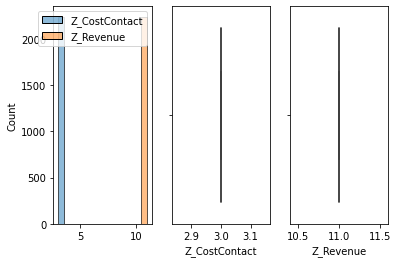

In [ ]:
# plot the histogram for each column to confirm constants (Z_CostContact and Z_Revenue)
plt.figure(figsize=(5,3))
cols = ['Z_CostContact','Z_Revenue']
print('#unique values for each column:\n', df[cols].nunique())
fig, axs = plt.subplots(ncols=3)
sn.histplot( df[cols],ax=axs[0])
sn.boxplot( df['Z_CostContact'], ax=axs[1])
sn.boxplot( df['Z_Revenue'], ax=axs[2])

**Check Income distribution**

Fitting 14 distributions: 100%|██████████| 14/14 [00:03<00:00,  4.65it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,7.091449e-11,20581.661933,-68842.373148,inf,0.054144,4.361507e-06
beta,8.922255e-11,7242.686680,-68318.041638,inf,0.050945,1.942402e-05
t,1.142895e-10,5727.741675,-67777.061438,inf,0.048864,4.887062e-05
cauchy,3.347530e-10,3196.054279,-65403.322256,inf,0.101045,3.771881e-20
burr,3.381485e-10,3362.349149,-65365.551223,inf,0.140972,6.942834e-39


best distribution:  {'norm': {'loc': 52247.25135379061, 'scale': 25167.396174162965}}


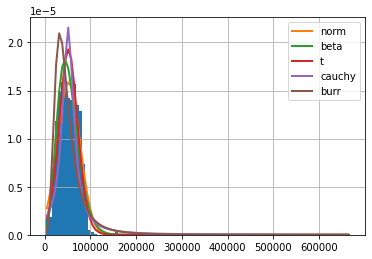

In [ ]:
distributions = list(set(get_common_distributions() + ['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm","t", "laplace"]))
def get_distribution(data):
  f = Fitter(data,
           distributions = distributions)
  f.fit()
  display(f.summary())
  print('best distribution: ', f.get_best(method = 'sumsquare_error'))

get_distribution(df['Income'].dropna())

**Explore some columns**

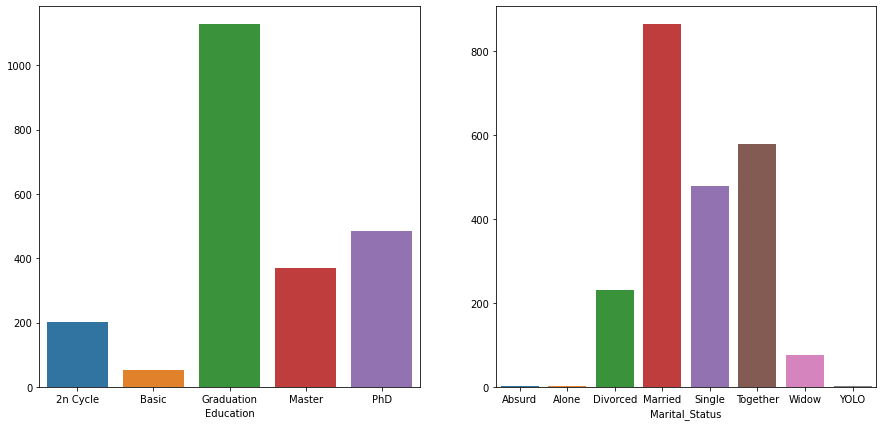

In [ ]:
education = df.groupby('Education')['Education'].count()
Marital_Status = df.groupby('Marital_Status')['Marital_Status'].count()

fig, axs = plt.subplots(ncols=2, figsize=(15,7))
sn.barplot(x= education.index ,y= education.values, ax=axs[0])
sn.barplot(x= Marital_Status.index ,y= Marital_Status.values, ax=axs[1])

# OR
# fig, ax = plt.subplots()
# plt.rcParams["figure.figsize"] = [7.50, 3.50]
# plt.rcParams["figure.autolayout"] = True
# df['Education'].value_counts().plot(ax=ax, kind='bar', xlabel='Education', ylabel='frequency')
# plt.show()

#complains:  21


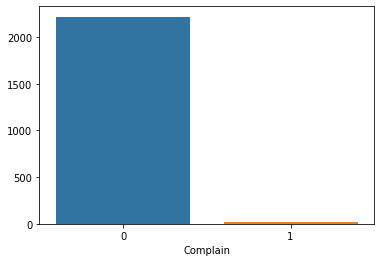

In [ ]:
complain = df.groupby('Complain')['Complain'].count()
sn.barplot(x= complain.index ,y= complain.values)
print('#complains: ', df['Complain'].value_counts()[1])

Summary:
- 2 constants (Z_CostContact and Z_Revenue)
- 2 categorical variables (Nominal) and one interval (dtcutomer)
- Income column contains missing values
- dtcutomer and year_birth could be converted into continuous columns
- many columns to be concatenated like:#children and spending amount
- noted outliers in year_birth and Income (study deeper)
- Income column follow normal distribution (check others later)
- most of the customers are couples while yolo and absurd are few
- most of the customers have 'graduation' level of education while customers with basic education are the lowest proportion

# **Manual feature selection(Remove Constants and Replace Columns)**

In [ ]:
#Remove constant columns
AllData = df.copy();
df = df.drop(['Z_CostContact', 'Z_Revenue'], axis = 1);

#Replace dtcustomer and year_birth

def joinDate(joinDate):
    joinDate = datetime.strptime(joinDate, "%Y-%m-%d")
    today = date.today()
    delta = relativedelta.relativedelta(today, joinDate)
    res_months = delta.months + (delta.years * 12)
    return res_months
df['joinDate'] = df['Dt_Customer'].apply(joinDate)

def age(born):
    today = date.today().year
    age = (today - born) if (today - born)< 100 else nan
    return age
df['Age'] = df['Year_Birth'].apply(age)

#Combine spending amount on different items into Spending column, and combine #kids and #teenagers into children column
df['Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] +  df['MntSweetProducts'] + df['MntGoldProds']
df['children'] = df['Kidhome'] + df['Teenhome']

# **Decide how to handle missing values (columns: Income)**

- test randomness (https://towardsdatascience.com/statistical-test-for-mcar-in-python-9fb617a76eac)
- Handle missing values using KNNImputation (https://digitaltesseract.com/data-imputation-techniques-an-introduction/)

**Check correlation between income and several other columns (education, marital_status, age, spending and #children)**

Anova results for (income and education) is:  F_onewayResult(statistic=26.07164675053625, pvalue=3.747866131258904e-21)
biserialr test result for (income and education) is:  PointbiserialrResult(correlation=array([0.14490655407030226], dtype=object), pvalue=5.793460617140379e-12)
Anova results for (income and Marital_Status) is:  F_onewayResult(statistic=1.1204202928862081, pvalue=0.34722957754903594)
biserialr test result for (income and Marital_Status) is:  PointbiserialrResult(correlation=array([0.04115154877521981], dtype=object), pvalue=0.05169763065958761)
Anova results for (income and children) is:  F_onewayResult(statistic=94.4100039244847, pvalue=1.5912330517032255e-57)


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


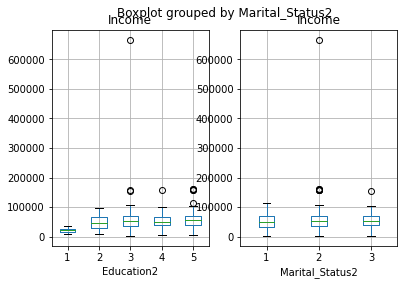

In [ ]:
from sklearn import preprocessing

# Assumption(H0) is that Education and Income are NOT correlated
# We accept the Assumption(H0) only when P-Value > 0.05

# anova for 3 or more independent groups (graduate, master, phd,..) or (single, married,...) or (#children: 0, 1, 2, 3)
df['Education2'] = df['Education'].replace({'Basic':1,'2n Cycle':2, 'Graduation':3,'Master':4, 'PhD':5}, inplace=False)
# Yolo and Absurd values for Marital_status are ambiguous and costitute only 4 observations, so I am going to drop them
df.drop(df.index[df['Marital_Status'].isin(['YOLO','Absurd'])], inplace = True)
df['Marital_Status2'] = df['Marital_Status'].replace({'Single':1,'Alone':1, 'Together':2,'Married':2, 'Divorced':3,'Widow':3}, inplace=False)
# the same when I dopped na
df['Income2'] = df[['Income']].fillna(0)
scaler = StandardScaler()
normalizedIncome = scaler.fit_transform(df['Income2'].values.reshape(-1, 1))
#################################
# anova test for income and education
CategoryGroupLists=df.groupby(['Education'])['Income2'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('Anova results for (income and education) is: ', AnovaResults)
# biserialr test for income and education
from scipy import stats
print('biserialr test result for (income and education) is: ',stats.pointbiserialr(df['Education2'], normalizedIncome))
#################################
# anova test for income and Marital_Status
CategoryGroupLists=df.groupby(['Marital_Status'])['Income2'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('Anova results for (income and Marital_Status) is: ', AnovaResults)
# biserialr test for income and Marital_Status
from scipy import stats
print('biserialr test result for (income and Marital_Status) is: ',stats.pointbiserialr(df['Marital_Status2'],normalizedIncome))
#################################
# anova test for income and children
CategoryGroupLists=df.groupby(['children'])['Income2'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('Anova results for (income and children) is: ', AnovaResults)
fig, axs = plt.subplots(ncols=2)
df.boxplot(column='Income', by='Education2', ax=axs[0])
df.boxplot(column='Income', by='Marital_Status2', ax=axs[1])

Pearsons results for age and income is:  0.1527241440555123 3.860600573456517e-13
Spearman results for age and income is:            Income2      Age2
Income2  1.000000  0.209383
Age2     0.209383  1.000000
Pearsons results for Spending and income is:  0.65392770783139 5.544534818213777e-273
Spearman results for Spending and income is:             Income2  Spending
Income2   1.000000  0.836213
Spending  0.836213  1.000000


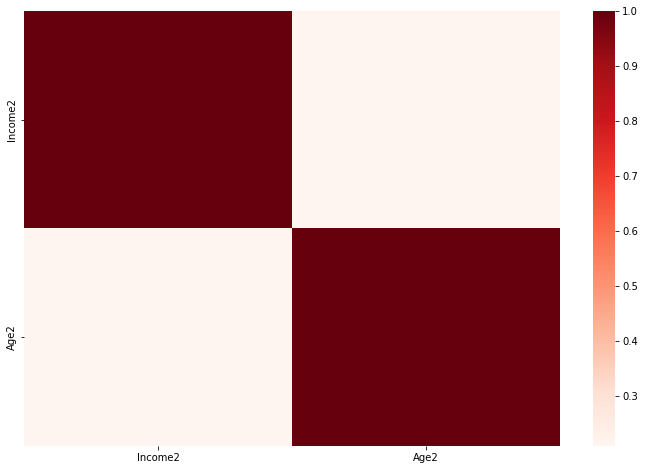

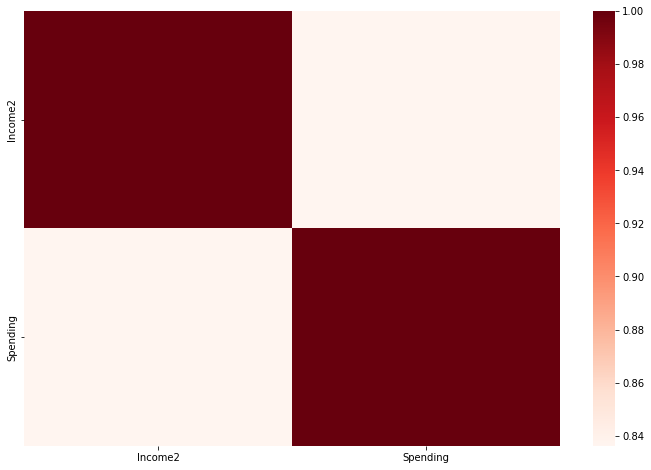

In [ ]:
df['Age2'] = df[['Age']].fillna(0)
#####################################
# correlation (age and income)
r,p_value = pearsonr(df['Age2'], df['Income2'])
print('Pearsons results for age and income is: ', r, p_value)
corr = df[['Income2','Age2']].corr(method="spearman")
kot = corr[corr>=.7]
plt.figure(figsize=(12,8))
sn.heatmap(corr, cmap="Reds")
print('Spearman results for age and income is: ', corr)
#####################################
# correlation (age and Spending)
r,p_value = pearsonr(df['Spending'], df['Income2'])
print('Pearsons results for Spending and income is: ', r, p_value)
corr = df[['Income2','Spending']].corr(method="spearman")
kot = corr[corr>=.7]
plt.figure(figsize=(12,8))
sn.heatmap(corr, cmap="Reds")
print('Spearman results for Spending and income is: ', corr)

In [ ]:
# group null_incomes by education and other columns
display(df[df['Income'].isnull()])
null_incomes_groups = df[df['Income'].isnull()].groupby('Education');
null_incomes_groups.describe()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Complain,Response,joinDate,Age,Spending,children,Education2,Marital_Status2,Income2,Age2
10,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,...,0,0,109,40.0,19,1,3,2,0.0,40.0
27,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,...,0,0,118,37.0,637,1,3,1,0.0,37.0
43,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,...,0,0,109,64.0,186,0,5,1,0.0,64.0
48,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,...,0,0,108,72.0,124,3,3,1,0.0,72.0
58,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,...,0,0,114,41.0,46,1,3,1,0.0,41.0
71,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,...,0,0,123,50.0,109,1,2,2,0.0,50.0
90,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,...,0,0,121,66.0,603,3,5,2,0.0,66.0
91,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,...,0,0,103,66.0,18,2,3,1,0.0,66.0
92,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,...,0,0,109,50.0,985,0,4,2,0.0,50.0
128,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,...,0,0,113,62.0,404,1,5,2,0.0,62.0


Year_Birth                                                          \
                count         mean        std     min     25%     50%     75%   
Education                                                                       
2n Cycle          3.0  1971.666667   7.094599  1964.0  1968.5  1973.0  1975.5   
Graduation       11.0  1969.545455  13.699370  1951.0  1957.5  1970.0  1982.5   
Master            5.0  1961.800000  12.833550  1943.0  1954.0  1969.0  1970.0   
PhD               5.0  1966.000000  10.198039  1957.0  1959.0  1961.0  1972.0   

                   Income       ... Income2       Age2                        \
               max  count mean  ...     75%  max count       mean        std   
Education                       ...                                            
2n Cycle    1978.0    0.0  NaN  ...     0.0  0.0   3.0  51.333333   7.094599   
Graduation  1989.0    0.0  NaN  ...     0.0  0.0  11.0  53.454545  13.699370   
Master      1973.0    0.0  NaN  ...     0.0  0.0   5.0  61.200000  12.833550   
PhD         1981.0    0.0  NaN  ...     0.0  0.0   5.0  57.000000  10.198039   

                                          
             min   25%   50%   75%   max  
Education                                 
2n Cycle    45.0  47.5  50.0  54.5  59.0  
Graduation  34.0  40.5  53.0  65.5  72.0  
Master      50.0  53.0  54.0  69.0  80.0  
PhD         42.0  51.0  62.0  64.0  66.0  

[4 rows x 248 columns]

Summary:
- We reject H0 for (income and education) and for (income and children), but from boxplot these columns (education and children) don't have serious change regarding the income colomn. We can't reject H0  not for income and marital_status.
- People with basic education seems to have low income comparing with other educational groups (from boxplot above). 
- Only spending has high correlation with income

 **note:** check correlation after handling outliers

- Most mising values (in Income column) are from graduation group but that gives us nothing because of the low number and difference between education types

- Missing values in Income column seems to be random, droping rows with missing value is the best solution especially that we have only a few missing values, but **out of curiosity** I will try to fill mising values according to education groups, and spending column (high correlation with income column)

# **Remove unwanted columns**

In [ ]:
df2 = df.copy()
df = df.drop(['Year_Birth', 'Kidhome','Teenhome', 'Dt_Customer','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Income2', 'Age2','Complain'], axis=1)
display(df.head())
df.columns

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,joinDate,Age,Spending,children,Education2,Marital_Status2
0,Graduation,Single,58138.0,58,3,8,10,4,7,0,...,0,0,0,1,123,66.0,1617,0,3,1
1,Graduation,Single,46344.0,38,2,1,1,2,5,0,...,0,0,0,0,105,69.0,27,2,3,1
2,Graduation,Together,71613.0,26,1,8,2,10,4,0,...,0,0,0,0,112,58.0,776,0,3,2
3,Graduation,Together,26646.0,26,2,2,0,4,6,0,...,0,0,0,0,106,39.0,53,1,3,2
4,PhD,Married,58293.0,94,5,5,3,6,5,0,...,0,0,0,0,107,42.0,422,1,5,2


Index(['Education', 'Marital_Status', 'Income', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'joinDate', 'Age',
       'Spending', 'children', 'Education2', 'Marital_Status2'],
      dtype='object')

# **Handle missing values**

**Compare 3 methods to handle missing values: dropna and imputation**
impute according to spending, hence we got a high correlation

**(due to curiosity)** impute according to education even without getting a high correlation (My theory: education affects financial situation and job type and it is possible that people with low education may tend to avoid filling the income column)

In [ ]:
# KNNImputer (income)
imputer = KNNImputer(n_neighbors=5, weights="uniform")
df_KNNImputer_Education = pd.DataFrame(imputer.fit_transform(df[['Education2']]))
df_KNNImputer_Spending = pd.DataFrame(imputer.fit_transform(df[['Spending']]))
df_KNNImputer = pd.DataFrame(imputer.fit_transform(df.loc[:, ~df.columns.isin(['Education', 'Marital_Status'])]))

In [ ]:
# dropna (income)
df_dropna = df.dropna()

In [ ]:
# PREDICTIVE MODELS (REGRESSION METHODS) (income)
imputer = IterativeImputer(BayesianRidge())
df_regression_education = pd.DataFrame(imputer.fit_transform(df[['Education2']]))
df_regression_Spending = pd.DataFrame(imputer.fit_transform(df[['Spending']]))
df_regression = pd.DataFrame(imputer.fit_transform(df.loc[:, ~df.columns.isin(['Education', 'Marital_Status'])]))

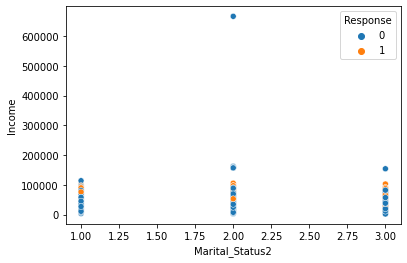

In [ ]:
sn.scatterplot(x = "Marital_Status2", y = "Income", data = df, hue = "Response")

In [ ]:
# drop null age and impute income
df['Age'].isnull().sum()
df = df.dropna(subset=['Age'])
display(df['Age'].isnull().sum())
display(df.info())

0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2233 non-null   object 
 1   Marital_Status       2233 non-null   object 
 2   Income               2209 non-null   float64
 3   Recency              2233 non-null   int64  
 4   NumDealsPurchases    2233 non-null   int64  
 5   NumWebPurchases      2233 non-null   int64  
 6   NumCatalogPurchases  2233 non-null   int64  
 7   NumStorePurchases    2233 non-null   int64  
 8   NumWebVisitsMonth    2233 non-null   int64  
 9   AcceptedCmp3         2233 non-null   int64  
 10  AcceptedCmp4         2233 non-null   int64  
 11  AcceptedCmp5         2233 non-null   int64  
 12  AcceptedCmp1         2233 non-null   int64  
 13  AcceptedCmp2         2233 non-null   int64  
 14  Response             2233 non-null   int64  
 15  joinDate             2233 non-null   i

None

## **Detect and handle outliers**

https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8


# 1.   Get Age, Income and Spending distribution




In [ ]:
import plotly.express as px
for col in df[['Education','Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'children']]:
       fig = px.pie(df_dropna[col], values=df_dropna[col].value_counts(), names=df_dropna[col].unique().tolist(),width=400, height=400)
       fig.show()
       print(df_dropna[col].value_counts())

Graduation    1115
PhD            478
Master         364
2n Cycle       198
Basic           54
Name: Education, dtype: int64


Married     857
Together    572
Single      470
Divorced    231
Widow        76
Alone         3
Name: Marital_Status, dtype: int64


0    2046
1     163
Name: AcceptedCmp3, dtype: int64


0    2045
1     164
Name: AcceptedCmp4, dtype: int64


0    2049
1     160
Name: AcceptedCmp5, dtype: int64


0    2068
1     141
Name: AcceptedCmp1, dtype: int64


0    2179
1      30
Name: AcceptedCmp2, dtype: int64


0    1878
1     331
Name: Response, dtype: int64


1    1113
0     630
2     416
3      50
Name: children, dtype: int64


Get Income Distribution:


Fitting 14 distributions: 100%|██████████| 14/14 [00:02<00:00,  5.07it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,7.159587e-11,2.055507e+04,-68596.755715,inf,0.053991,4.889310e-06
chi2,7.976651e-11,1.147964e+04,-68350.336698,inf,0.037995,3.307791e-03
rayleigh,8.384585e-11,inf,-68247.860301,inf,0.063476,3.512645e-08
beta,8.957484e-11,7.220867e+03,-68086.457110,inf,0.051034,1.934330e-05
t,1.152172e-10,5.723782e+03,-67538.054455,inf,0.048892,4.993376e-05


best distribution:  {'norm': {'loc': 52221.8017202354, 'scale': 25187.298846986414}}


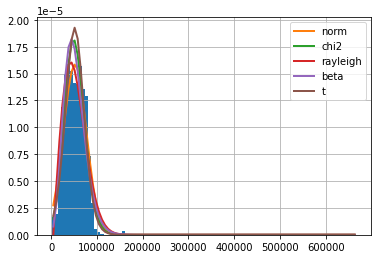

In [ ]:
print('Get Income Distribution:')
get_distribution(df_dropna['Income'])

Get Spending Distribution:


Fitting 14 distributions: 100%|██████████| 14/14 [00:03<00:00,  4.62it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.000012,1686.991980,-42054.268270,inf,0.095711,4.599282e-18
chi2,0.000012,1708.488594,-42049.271150,inf,0.096596,2.160004e-18
gamma,0.000013,1720.504103,-41906.147281,inf,0.110428,6.456089e-24
powerlaw,0.000013,1626.371831,-41786.508591,inf,0.102919,7.971844e-21
exponpow,0.000014,1666.008709,-41712.649115,inf,0.128243,3.933122e-32


best distribution:  {'beta': {'a': 0.5764744128543237, 'b': 1.9145379556693882, 'loc': 4.999999999999999, 'scale': 2561.527322842313}}


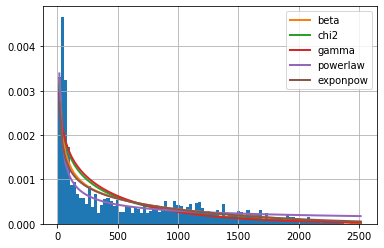

In [ ]:
print('Get Spending Distribution:')
get_distribution(df_dropna['Spending'])

Get Age Distribution:


Fitting 14 distributions: 100%|██████████| 14/14 [00:02<00:00,  5.63it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.036362,873.278772,-24300.295713,inf,0.052257,0.000011
chi2,0.036867,872.850312,-24277.507983,inf,0.055956,0.000002
rayleigh,0.036937,inf,-24281.044444,inf,0.056735,0.000001
lognorm,0.036997,873.207764,-24269.732508,inf,0.056711,0.000001
gamma,0.037063,873.168793,-24265.825101,inf,0.056773,0.000001


best distribution:  {'beta': {'a': 2.4765044060371224, 'b': 2.611684456301929, 'loc': 26.148289795542297, 'scale': 57.47334524022857}}


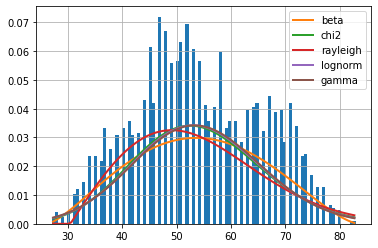

In [ ]:
print('Get Age Distribution:')
get_distribution(df_dropna['Age'])

Fitting 14 distributions: 100%|██████████| 14/14 [00:02<00:00,  5.72it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.036362,873.278772,-24300.295713,inf,0.052257,0.000011
chi2,0.036867,872.850312,-24277.507983,inf,0.055956,0.000002
rayleigh,0.036937,inf,-24281.044444,inf,0.056735,0.000001
lognorm,0.036997,873.207764,-24269.732508,inf,0.056711,0.000001
gamma,0.037063,873.168793,-24265.825101,inf,0.056773,0.000001


best distribution:  {'beta': {'a': 2.4765044060371224, 'b': 2.611684456301929, 'loc': 26.148289795542297, 'scale': 57.47334524022857}}


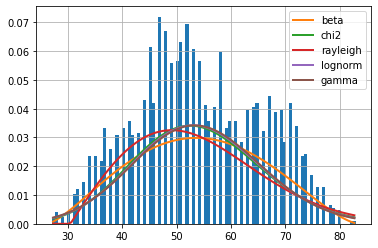

In [ ]:
get_distribution(df_dropna['Age'])

# 2.   Get Age, Spending and Income Outliers using Interquartile Range Method



In [ ]:
def get_outliers_std(data):
  from numpy import percentile

  # calculate interquartile range
  q25, q75 = percentile(data, 25), percentile(data, 75)
  iqr = q75 - q25
  print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower, upper = abs(q25 - cut_off), q75 + cut_off
  print('Original length: %d' % len(data))
  outliers = [x for x in data if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))
  print('lower: ',lower,', upper',upper)
  if(len(outliers)>0):
     non_outliers = [x for x in df_dropna['Income'] if x >= lower and x <= upper]
     non_outliers_df = pd.DataFrame(non_outliers, columns = ['non_outliers'])
     get_distribution(non_outliers_df)
     return outliers
  else:
    return 0
 

Get Income Outliers using Standard Deviation Method:
Percentiles: 25th=35196.000, 75th=68487.000, IQR=33291.000
Original length: 2209
Identified outliers: 56
lower:  14740.5 , upper 118423.5


Fitting 14 distributions: 100%|██████████| 14/14 [00:02<00:00,  4.94it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,7.054273e-10,2407.355477,-61861.236929,inf,0.045853,2.261959e-04
rayleigh,1.019687e-09,2375.658482,-61083.320328,inf,0.065152,2.175101e-08
chi2,1.206937e-09,2402.784567,-60712.670597,inf,0.054173,6.226944e-06
norm,1.208411e-09,2407.595238,-60717.716311,inf,0.057346,1.351087e-06
t,1.208416e-09,2409.595019,-60710.033272,inf,0.057347,1.350626e-06


best distribution:  {'beta': {'a': 2.002259203787272, 'b': 3.165093717142779, 'loc': 12768.206033008984, 'scale': 101846.65475100174}}


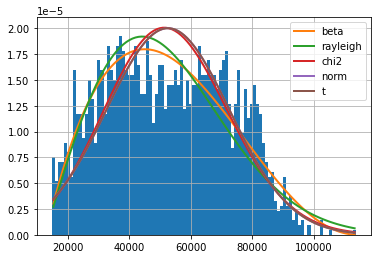

In [ ]:
# Income follows rayleigh distribution
print('Get Income Outliers using Standard Deviation Method:')
get_outliers_std(df_dropna['Income']);

Get Income Outliers using Standard Deviation Method:
Percentiles: 25th=69.000, 75th=1047.000, IQR=978.000
Original length: 2209
Identified outliers: 1919
lower:  1398.0 , upper 2514.0


Fitting 14 distributions: 100%|██████████| 14/14 [00:01<00:00,  9.27it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
exponpow,0.007783,1561.793175,-9.018430,inf,0.499670,0.501319
lognorm,0.008534,1816.384453,-8.834139,inf,0.493227,0.526726
powerlaw,0.009431,1322.621902,-8.634437,inf,0.500000,0.500000
beta,0.009447,1360.739470,-7.937909,inf,0.500000,0.500000
expon,0.009479,1380.385732,-9.317450,inf,0.500000,0.500000


best distribution:  {'exponpow': {'b': 0.2220359762179594, 'loc': 1729.9999999999998, 'scale': 1089.0057244035725}}


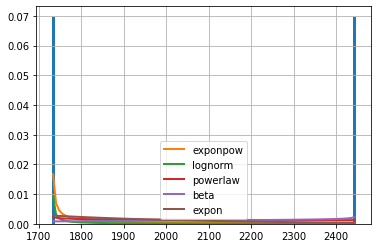

In [ ]:
# Spending follows chi2 distribution
print('Get Income Outliers using Standard Deviation Method:')
get_outliers_std(df_dropna['Spending']);

In [ ]:
# Age follows beta distribution
print('Get Income Outliers using Standard Deviation Method:')
get_outliers_std(df_dropna['Age']);

Get Income Outliers using Standard Deviation Method:
Percentiles: 25th=46.000, 75th=64.000, IQR=18.000
Original length: 2209
Identified outliers: 0
lower:  19.0 , upper 91.0


# 3.   Get Age, Spending and Income using one-class classification (LocalOutlierFactor)



#outliers:  9


Fitting 14 distributions: 100%|██████████| 14/14 [00:03<00:00,  4.41it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.000013,1682.502994,-41724.495724,inf,0.099546,1.978110e-19
chi2,0.000013,1685.808399,-41700.651332,inf,0.099770,1.623663e-19
beta,0.000013,1645.817058,-41681.047288,inf,0.101889,2.453617e-20
exponpow,0.000014,1674.457186,-41558.843182,inf,0.108372,5.895649e-23
powerlaw,0.000014,1609.390309,-41531.944749,inf,0.085102,2.606654e-14


best distribution:  {'gamma': {'a': 0.7005464216718815, 'loc': 5.999999999999999, 'scale': 860.865951630319}}


array([[2302],
       [2486],
       [ 108],
       [2440],
       [2525],
       [2302],
       [2524],
       [   5],
       [2525]])

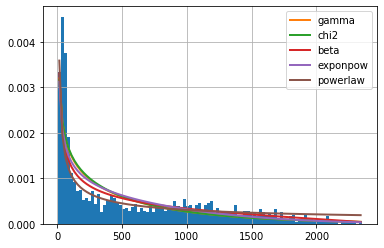

In [ ]:
lof = LocalOutlierFactor()
a = pd.DataFrame(df_dropna['Spending'].tolist()).to_numpy()
outliers = lof.fit_predict(a)
lofs_index = where(outliers==-1)
outliers_values = a[lofs_index]

mask = outliers != -1
non_outliers = a[mask, :]
non_outliers = pd.DataFrame(non_outliers, columns = ['non_outliers'])
print('#outliers: ',len(outliers_values))
get_distribution(non_outliers)
outliers_values

# 4.   Plot (boxplot) Age, Spending and Income to detect outliers manually

In [ ]:
# original code: https://blog.rtwilson.com/automatically-annotating-a-boxplot-in-matplotlib/ and https://towardsdatascience.com/how-to-fetch-the-exact-values-from-a-boxplot-python-8b8a648fc813
def get_boxplot(data):
  
    x_offset=0.05
    x_loc=0 # one df column - cause other columns have different value range
    text_offset_x=50
    text_offset_y=0
    annotate_params = dict(xytext=(text_offset_x, text_offset_y), textcoords='offset points', arrowprops={'arrowstyle':'->'})

    plt.figure(figsize=(10, 10))
    bp = plt.boxplot(data, showmeans=True)
    median = bp['medians'][x_loc].get_ydata()[0]
    mean = bp['means'][x_loc].get_ydata()[0]
    minimum = bp['caps'][x_loc*2].get_ydata()[0]
    maximum = bp['caps'][(x_loc*2)+1].get_ydata()[0]
    q1 = bp['boxes'][x_loc].get_ydata()[0]
    q3 = bp['boxes'][x_loc].get_ydata()[2]

    plt.annotate('median= '+ str(median), (x_loc+ 1 + x_offset, median), **annotate_params)
    plt.annotate('q1(25%)='+ str(q1), (x_loc + 1 +x_offset, q1), **annotate_params)
    plt.annotate('q3(75%)='+ str(q3), (x_loc +1 + x_offset, q3), **annotate_params)
    plt.annotate('minimum(5%)='+ str(minimum), (x_loc+1 + x_offset, minimum), **annotate_params)
    plt.annotate('maximum(95%)='+ str(maximum), (x_loc +1 + x_offset, maximum), **annotate_params)

    fliers = bp['fliers'][x_loc].get_ydata()
    lower_outliers = []
    upper_outliers = []
    for outlier in fliers:
        if outlier < q1:
            lower_outliers.append(round(outlier, 1))
        else:
            upper_outliers.append(round(outlier, 1)) 
        

    stats = [median, mean, minimum, maximum, q1, q3, lower_outliers, upper_outliers]
    stats_names = ['Median', 'Mean', 'Minimum', 'Maximum', 'Q1', 'Q3', 'Lower outliers', 'Upper outliers']
    for j in range(len(stats)):
        print(f'{stats_names[j]}: {stats[j]}')
    print('\n')
    return lower_outliers + upper_outliers

box_plot for Income :
Median: 51373.0
Mean: 52221.8017202354
Minimum: 1730.0
Maximum: 113734.0
Q1: 35196.0
Q3: 68487.0
Lower outliers: []
Upper outliers: [157243.0, 162397.0, 153924.0, 160803.0, 157733.0, 157146.0, 156924.0, 666666.0]


box_plot for Spending :
Median: 396.0
Mean: 606.6573110004526
Minimum: 5.0
Maximum: 2486.0
Q1: 69.0
Q3: 1047.0
Lower outliers: []
Upper outliers: [2525, 2524, 2525]


box_plot for Age :
Median: 53.0
Mean: 54.09189678587596
Minimum: 27.0
Maximum: 83.0
Q1: 46.0
Q3: 64.0
Lower outliers: []
Upper outliers: []




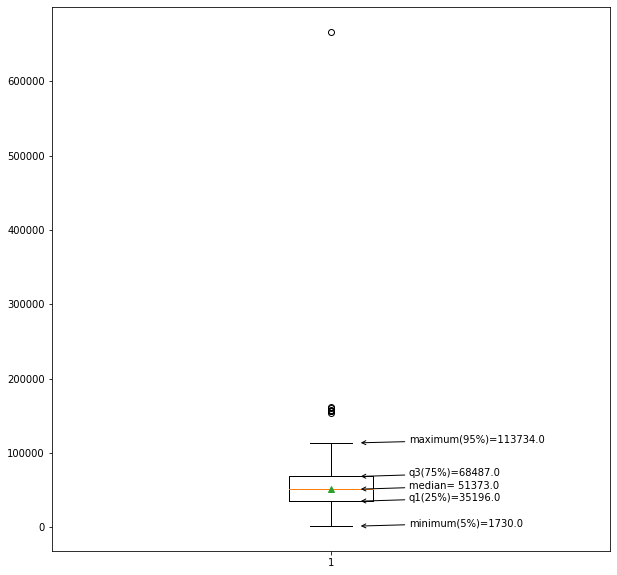

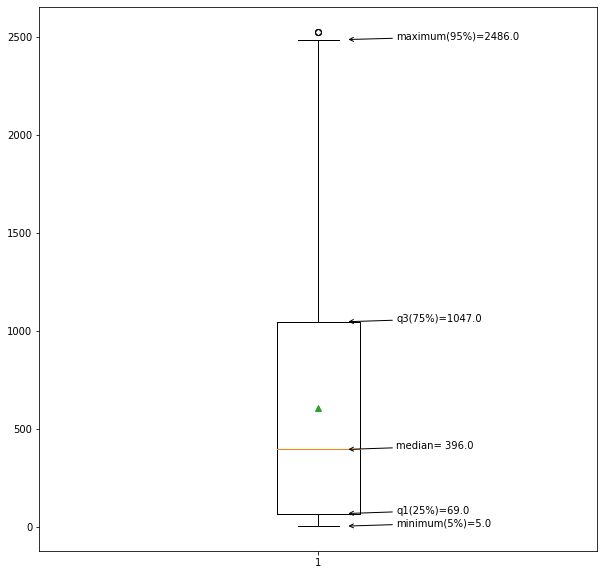

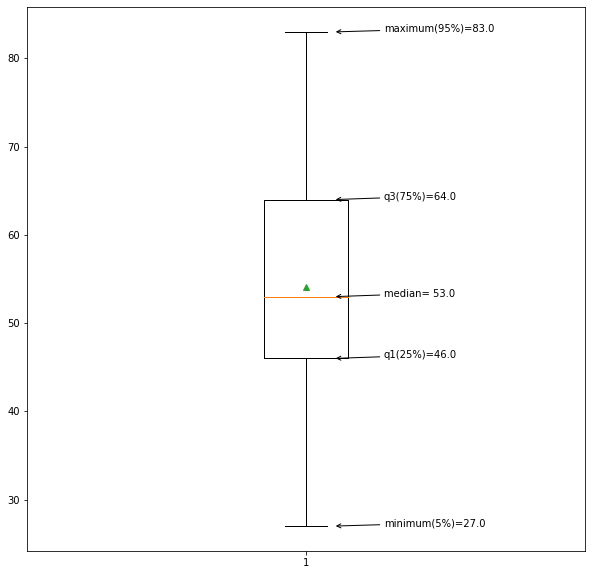

In [ ]:
cols = ['Income','Spending','Age']
for col in cols:
  print('box_plot for',col,':')
  Dynamic_Variable_Name = col+'_outliers'
  vars()[Dynamic_Variable_Name] =  get_boxplot(df_dropna[col])

In [ ]:
df_drop_na_outliers = df_dropna[~df_dropna.Spending.isin(Spending_outliers) & ~df_dropna.Income.isin(Income_outliers)]

- one-class classification (LocalOutlierFactor) doesn't work for me, as I don't want to drop a customer because others don't spend the same (that doesn't make him not normal)
- Interquartile Range Method drops many customers (std method with different range is a not reliable as the distribution is not Gaussian-like 
https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/?fbclid=IwAR1fSQYJNPm6ZRZhsgC4Jns9ybmbqn6vSZg9KPMWTOD3v4bi7uQwm9zuo_M)
- detect outliers manually using the box plot is my best choice
- Transformation, Imputation and Standardization (apply later) can also remove outliers

# **Feature Selection**

**Encode non-numeric data**

for Education column we can stick with Ordinal Number Encoding as Education has ordered categories, but for marital_status it is better to use techniques like one_hot encoding (Multicollinearity problem emerged and there is a discussion that recommend removing one hot_encoded column but not agreed on)

In [ ]:
oHe = OneHotEncoder()
transformer=('encode',oHe,['Marital_Status2'])
ct = ColumnTransformer(transformers=[transformer],remainder='passthrough')
dataset = pd.DataFrame(ct.fit_transform(df_drop_na_outliers), columns = ct.get_feature_names())

dataset = dataset.drop(['Education', 'Marital_Status'], axis=1)
dataset.rename(columns = {'encode__x0_1' : 'Marital_Status1', 'encode__x0_2' : 'Marital_Status2', 'encode__x0_3' : 'Marital_Status3', 'Education2' : 'Education'}, inplace = True)
target = dataset.pop('Response')
dataset = pd.concat([dataset, target], 1)
dataset.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

<ipython-input-37-9d6f91bdf3e9>:9: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



,Marital_Status1,Marital_Status2,Marital_Status3,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,joinDate,Age,Spending,children,Education,Response
0,1.0,0.0,0.0,58138.0,58,3,8,10,4,7,...,0,0,0,0,123,66.0,1617,0,3,1
1,1.0,0.0,0.0,46344.0,38,2,1,1,2,5,...,0,0,0,0,105,69.0,27,2,3,0
2,0.0,1.0,0.0,71613.0,26,1,8,2,10,4,...,0,0,0,0,112,58.0,776,0,3,0
3,0.0,1.0,0.0,26646.0,26,2,2,0,4,6,...,0,0,0,0,106,39.0,53,1,3,0
4,0.0,1.0,0.0,58293.0,94,5,5,3,6,5,...,0,0,0,0,107,42.0,422,1,5,0


**Try 3 feature selection methods**

**RFE** is a wrapper-type feature selection algorithm. This means that a different machine learning algorithm is given and used in the core of the method, is wrapped by RFE, and used to help select features. This is in contrast to **filter-based** feature selections (like mutual_info_classif) that score each feature and select those features with the largest (or smallest) score.

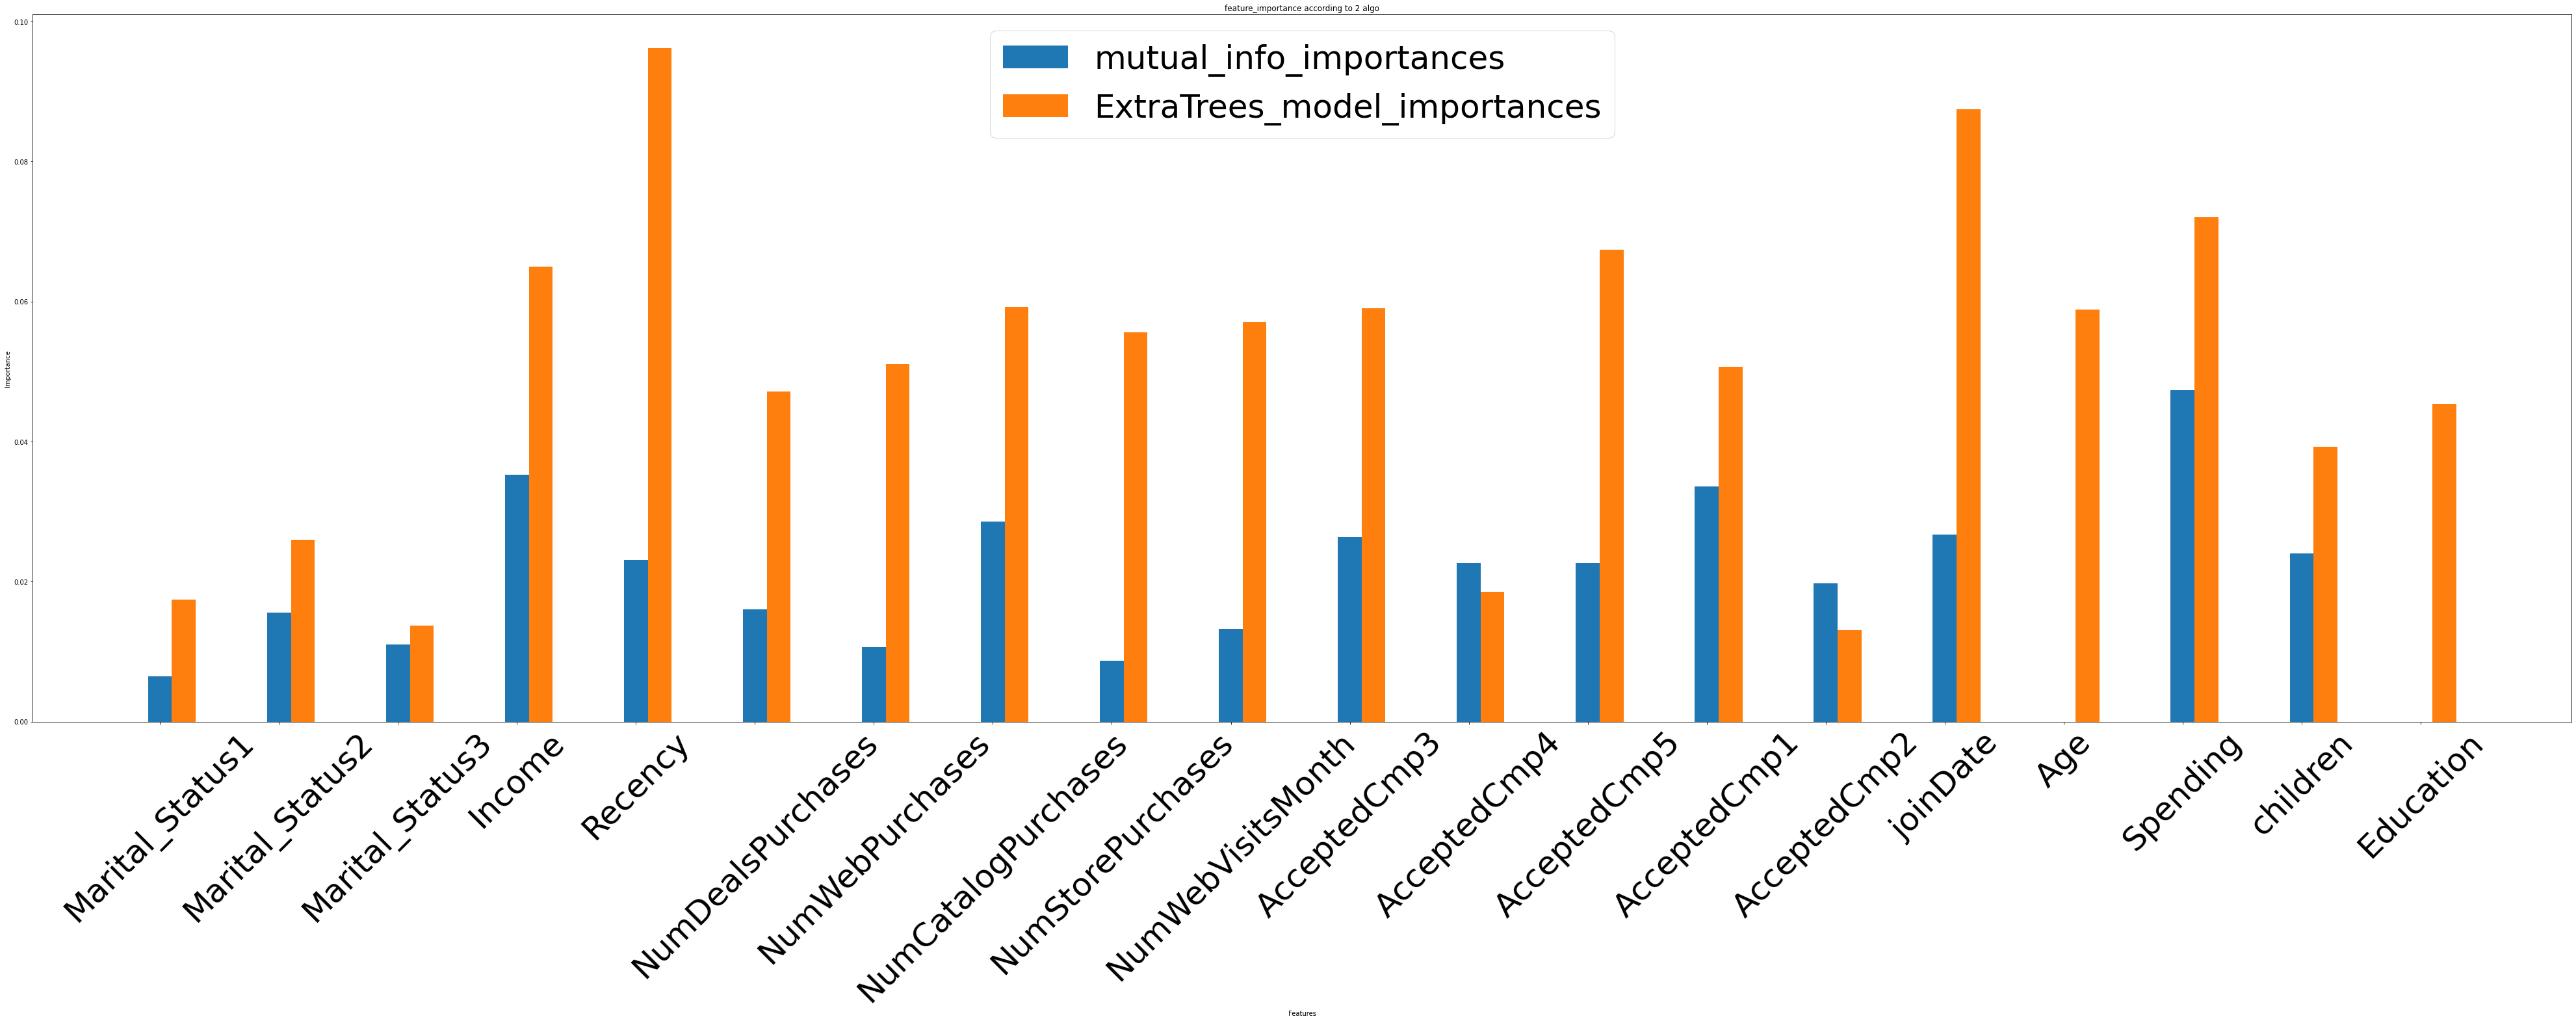

In [ ]:
# define dataset
X = dataset.loc[:, dataset.columns != 'Response']
y = dataset['Response'].astype('int')

# 1- Find features_importance using ExtraTreesClassifier
ExtraTrees_model = ExtraTreesClassifier()
ExtraTrees_model.fit(X, y)
# display the relative importance of each attribute
# i = 0
# for col in X.columns:
#   print(col,': ',ExtraTrees_model.feature_importances_[i])
#   i+=1
# ExtraTrees_feat_importances = pd.Series(ExtraTrees_model.feature_importances_, dataset.columns[0: len(dataset. columns)-1])
# ExtraTrees_feat_importances.plot(kind='bar')
# plt.show()
#-----------------------------------------------------------------------------------------------------------------------
# 2- Find features_importance using mutual_info_classif
from sklearn. feature_selection import mutual_info_classif
mutual_info_importances = mutual_info_classif(X, y)

# mutual_info_feat_importances = pd.Series(mutual_info_importances, dataset.columns[0: len(dataset. columns)-1])
# mutual_info_feat_importances.plot(kind='bar')
# plt. show()
#-----------------------------------------------------------------------------------------------------------------------
# Compare the two methods

X_plot = dataset.columns[0: len(dataset. columns)-1]
X_axis = np.arange(len(X_plot))

plt.rcParams['figure.figsize'] = [70, 20]  
plt.bar(X_axis, mutual_info_importances, 0.2, label = 'mutual_info_importances')
plt.bar(X_axis + 0.2, ExtraTrees_model.feature_importances_, 0.2, label = 'ExtraTrees_model_importances')




locs, labels = plt.xticks(X_axis, X_plot,fontsize=50)
plt.setp(labels, rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("feature_importance according to 2 algo")
plt.legend(fontsize=50)
plt.show()

In [ ]:
# 3- using rfe method
# automatically select the number of features for RFE
# code from: https://machinelearningmastery.com/rfe-feature-selection-in-python/

# create pipeline
rfe = RFECV(estimator=LogisticRegression())
model = LogisticRegression()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# fit rfecv to data
rfecv_data = pipeline.named_steps['s'].fit(X, y)


# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/lin

Accuracy: 0.886 (0.018)


DecisionTreeClassifier Accuracy: 0.844

LogisticRegression Accuracy: 0.885

Marital_Status1 rank = 1
Marital_Status2 rank = 1
Marital_Status3 rank = 1
Income rank = 4
Recency rank = 1
NumDealsPurchases rank = 1
NumWebPurchases rank = 1
NumCatalogPurchases rank = 1
NumStorePurchases rank = 1
NumWebVisitsMonth rank = 1
AcceptedCmp3 rank = 1
AcceptedCmp4 rank = 1
AcceptedCmp5 rank = 1
AcceptedCmp1 rank = 1
AcceptedCmp2 rank = 1
joinDate rank = 2
Age rank = 1
Spending rank = 3
children rank = 1
Education rank = 1


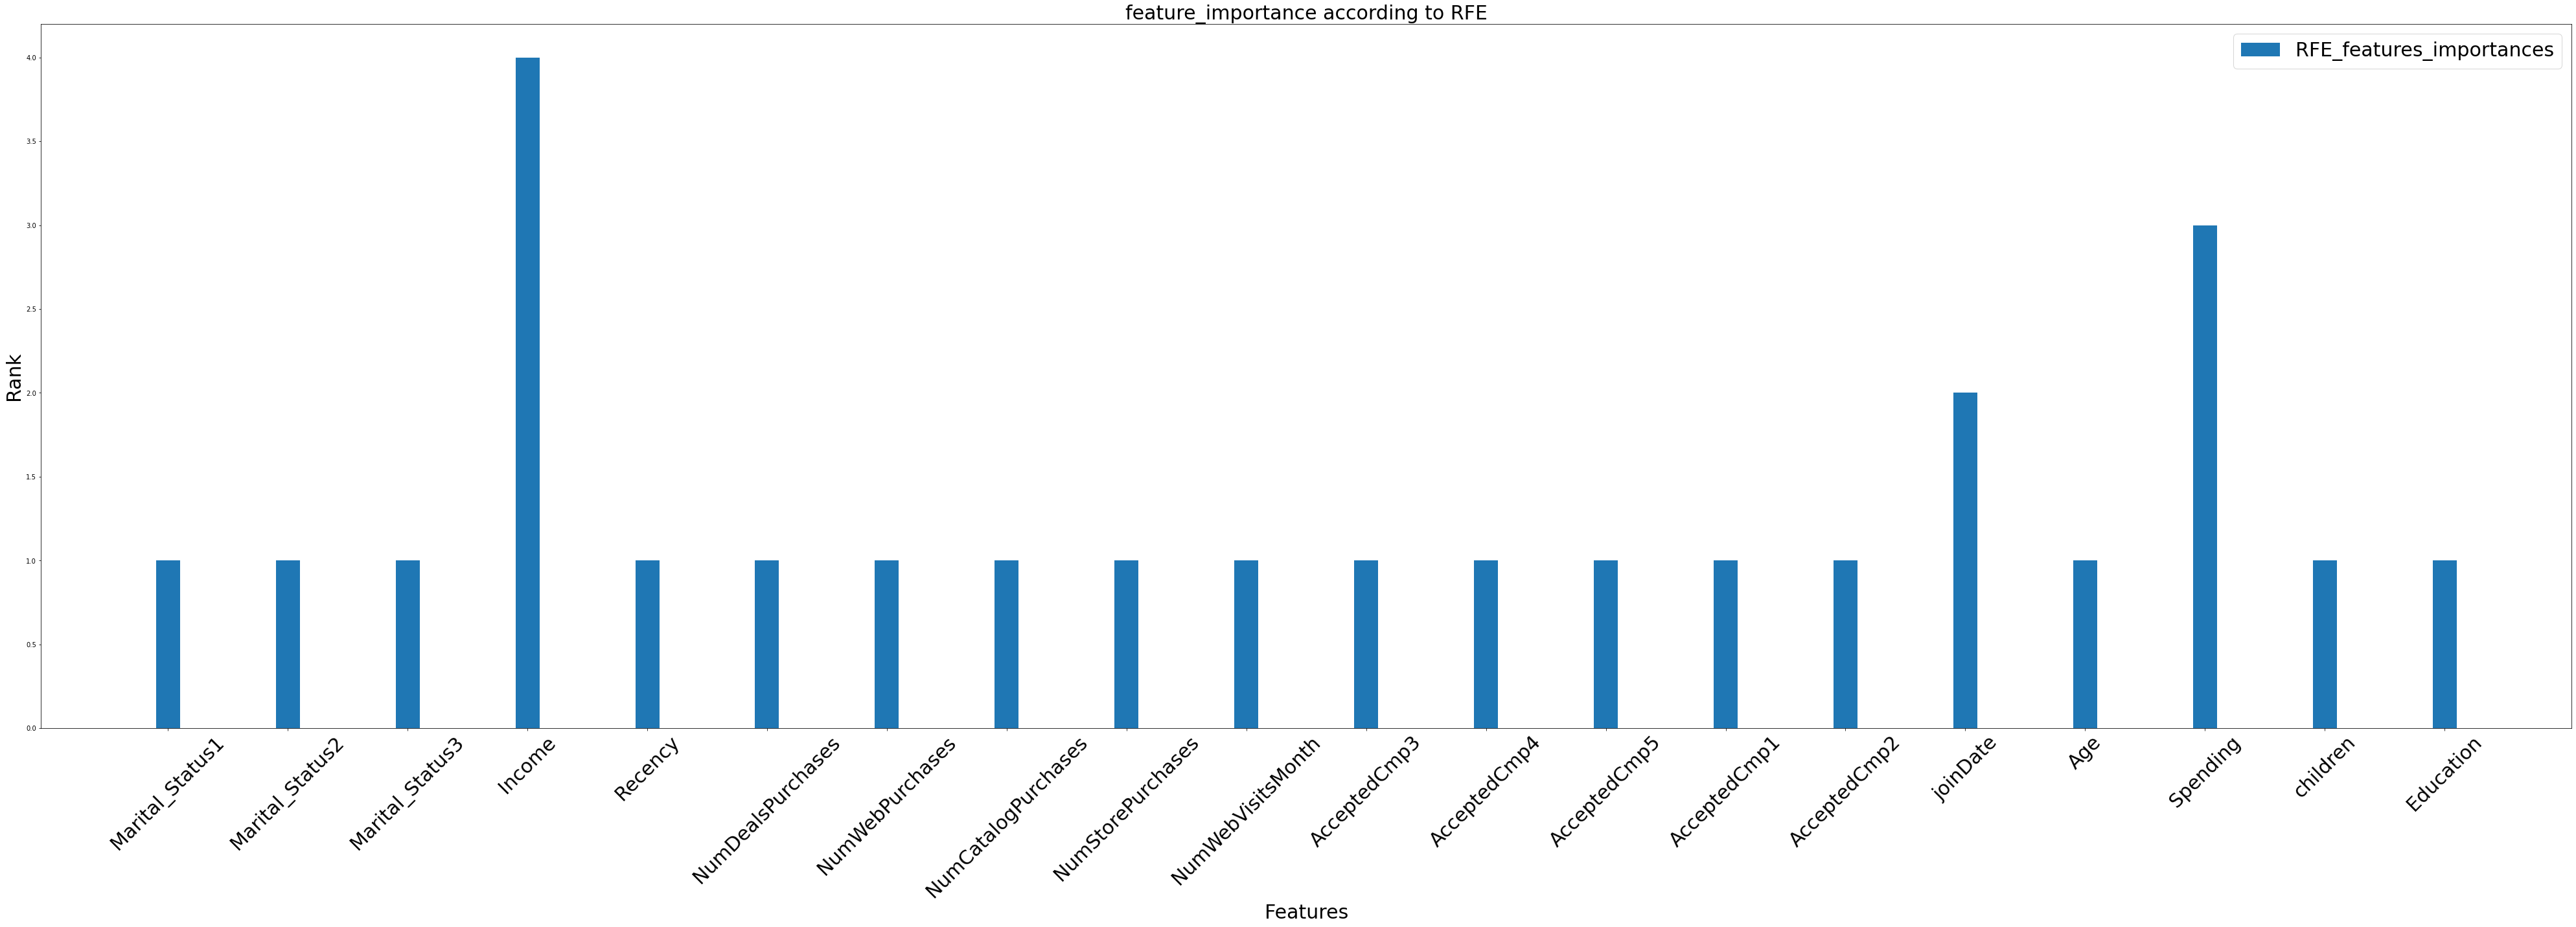

In [ ]:
# get the feature ranking
i=0
for col in  X.columns:
    print(col,'rank =',rfecv_data.ranking_[i])
    i+=1

plt.bar(X_axis, rfecv_data.ranking_, 0.2, label = 'RFE_features_importances')

locs, labels = plt.xticks(X_axis, X_plot,fontsize=30)
plt.setp(labels, rotation=45)
plt.xlabel("Features", fontsize=30)
plt.ylabel("Rank", fontsize=30)
plt.title("feature_importance according to RFE", fontsize=30)
plt.legend(fontsize=30)
plt.show()

- The most important Features for extraTrees are: recency, joinDate, spending and income (makes sense) and somewhat previous compains (5, 3 and 1), age and purchase methods, while marital_status, campains 2 and 4 are not that important.
- For mutual info: features like: spending, income and compain 5 are important, age and education are not, marital status doesn't matter too (same as extraTrees method), comapains 2 and 4 (same as extraTrees method)
- RFE most important features are income, Join_data and spending
- I may drop compains 2 and 4 and marital_status columns

In [ ]:
All_features_dataset = dataset.copy()
dataset = dataset.drop(['Marital_Status1','Marital_Status2','Marital_Status3','AcceptedCmp2', 'AcceptedCmp4'], axis = 1)

# **Check for imbalanced classes**

In [ ]:
dataset['Response'].value_counts()

0    1869
1     329
Name: Response, dtype: int64

We have imbalanced data problem

https://towardsdatascience.com/how-to-deal-with-imbalanced-data-in-python-f9b71aba53eb

**Applying ML algo before dealing with imbalanced classes**

In [ ]:
X = dataset.loc[:, dataset.columns != 'Response']
y = dataset['Response'].astype('int')
#Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1)

model=LogisticRegression()
model = model.fit(X_train, y_train)
pred = model.predict(X_test)

print("Original data ROC AUC score: ", roc_auc_score(y_test, pred))

Original data ROC AUC score:  0.5711028913588837


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
model = LogisticRegression()
pipeline = Pipeline(steps=[('model', model)])

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
score = mean(scores)
print('Original data ROC AUC score with cross_validation: %.3f' % score)

Original data ROC AUC score with cross_validation: 0.771


**Applying ML Algo after oversampling using SMOTE**

In [ ]:
print("Before oversampling: ",Counter(y_train))

SMOTE = SMOTE()

X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

print("After oversampling: ",Counter(y_train_SMOTE))

model=LogisticRegression()
clf_SMOTE = model.fit(X_train_SMOTE, y_train_SMOTE)
pred_SMOTE = clf_SMOTE.predict(X_test)

print("ROC AUC score for oversampled SMOTE data: ", roc_auc_score(y_test, pred_SMOTE))

Before oversampling:  Counter({0: 1306, 1: 232})
After oversampling:  Counter({0: 1306, 1: 1306})
ROC AUC score for oversampled SMOTE data:  0.6693065499624619


In [ ]:
X_SMOTE, y_SMOTE = SMOTE.fit_resample(X, y)
model = LogisticRegression()
pipeline = Pipeline(steps=[('model', model)])

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_SMOTE, y_SMOTE, scoring='roc_auc', cv=cv, n_jobs=-1)
score = mean(scores)
print('Oversampled data ROC AUC score with cross_validation: %.3f' % score)

Oversampled data ROC AUC score with cross_validation: 0.804


**Applying ML Algo after using pipline with a combination of under- and oversampling methods like RandomUnderSampler and SMOTE methodes in order**

In [ ]:
# define pipeline
model = LogisticRegression()
over = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.5)
pipeline = Pipeline(steps=[('o', over), ('u', under), ('model', model)])

# import libraries for evaluation

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
score = mean(scores)
print('ROC AUC score for the combined sampling method: %.3f' % score)

ROC AUC score for the combined sampling method: 0.785


# **Standardization**

In [ ]:
display(dataset.head())
display(X.columns)

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp5,AcceptedCmp1,joinDate,Age,Spending,children,Education,Response
0,58138.0,58,3,8,10,4,7,0,0,0,123,65.0,1617,0,3,1
1,46344.0,38,2,1,1,2,5,0,0,0,105,68.0,27,2,3,0
2,71613.0,26,1,8,2,10,4,0,0,0,112,57.0,776,0,3,0
3,26646.0,26,2,2,0,4,6,0,0,0,106,38.0,53,1,3,0
4,58293.0,94,5,5,3,6,5,0,0,0,107,41.0,422,1,5,0


Index(['Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp5', 'AcceptedCmp1', 'joinDate', 'Age',
       'Spending', 'children', 'Education'],
      dtype='object')

In [ ]:
cols = ['Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'joinDate', 'Age',
       'Spending', 'children', 'Education']
scaler = StandardScaler()
dataset[cols] = scaler.fit_transform(dataset[cols])

**Try training logistic regression on SMOTE data after standardization**

In [ ]:
X = dataset.loc[:, dataset.columns != 'Response']
y = dataset['Response'].astype('int')

X_SMOTE, y_SMOTE = SMOTE.fit_resample(X, y)
model = LogisticRegression()
pipeline = Pipeline(steps=[('model', model)])

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_SMOTE, y_SMOTE, scoring='roc_auc', cv=cv, n_jobs=-1)
score = mean(scores)
print('Oversampled data ROC AUC score with cross_validation: %.3f' % score)

Oversampled data ROC AUC score with cross_validation: 0.895


**We get a better result wuth roc_auc = 0.89**

**Try training logistic regression on SMOTE data with all features (before dropping marital_status and compains 2,4)**

In [ ]:
X = All_features_dataset.loc[:, All_features_dataset.columns != 'Response']
y = All_features_dataset['Response'].astype('int')

X_SMOTE, y_SMOTE = SMOTE.fit_resample(X, y)
model = LogisticRegression()
pipeline = Pipeline(steps=[('model', model)])

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_SMOTE, y_SMOTE, scoring='roc_auc', cv=cv, n_jobs=-1)
score = mean(scores)
print('Oversampled data ROC AUC score with cross_validation: %.3f' % score)

Oversampled data ROC AUC score with cross_validation: 0.812


Summary:

- LogisticRegression get me better results that SVC and DecisionTreeClassifier, but that was on the first try with cross validation and without tuning the three models so **it is not a final decision**
- Oversampling data using SMOTE method and training LogisticRegression on Scaled data (standard scaling) get me the best roc_auc